In [2]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns

# Aqui va la ruta de la carpeta con los datos en excel(los excels contiene el promedio de los datos)
paths = glob("./feature_kmt_dataset/feature_kmt_xlsx/feature_kmt_user_*.xlsx")
df = pd.concat([pd.read_excel(p) for p in paths],ignore_index=True)
# COLUMNAS
# dwell_avg: promedio del tiempo que una tecla permanece presionada.
# flight_avg: tiempo promedio entre pulsaciones consecutivas.
# traj_avg: longitud media de la trayectoria del cursor del ratón durante la sesión.

In [3]:
# verificar datos
# print(df.shape)
# print(df.info())
# print(df['label'].value_counts())
df_label0 = df.loc[df['label'] == 0]
df_label1 = df.loc[df['label'] == 1]

In [4]:
# Descripcion de los valores globales
df.describe()

,Unnamed: 0,dwell_avg,flight_avg,traj_avg,label
count,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000
mean,9.50000,0.115514,0.952100,471.587845,0.500000
std,5.76792,0.026339,0.701359,212.388368,0.500142
min,0.00000,0.061586,0.188908,179.164520,0.000000
25%,4.75000,0.095207,0.555139,322.691455,0.000000
50%,9.50000,0.117266,0.749423,411.584994,0.500000
75%,14.25000,0.130498,1.115375,559.801943,1.000000
max,19.00000,0.214586,9.905352,1860.326693,1.000000


In [5]:
# Descripcion de los valores segun label: 1->usuario legitimo, 0->usuario falso
# description = df.groupby('label')[['dwell_avg','flight_avg','traj_avg']].describe()
# Mostrar resultados en dos tablas claras
print("=== Análisis descriptivo para LABEL 0 (usuarios FALSOS) ===")
display(df_label0.describe())
print("\n=== Análisis descriptivo para LABEL 1 (usuarios LEGÍTIMOS) ===")
display(df_label1.describe())

=== Análisis descriptivo para LABEL 0 (usuarios FALSOS) ===


,Unnamed: 0,dwell_avg,flight_avg,traj_avg,label
count,880.000000,880.000000,880.000000,880.000000,880.0
mean,14.500000,0.114820,0.958079,476.669268,0.0
std,2.873915,0.025524,0.650967,217.462532,0.0
min,10.000000,0.061586,0.188908,181.932384,0.0
25%,12.000000,0.096938,0.574374,326.379233,0.0
50%,14.500000,0.117260,0.783890,413.305339,0.0
75%,17.000000,0.129855,1.126348,563.284944,0.0
max,19.000000,0.214586,7.152438,1860.326693,0.0



=== Análisis descriptivo para LABEL 1 (usuarios LEGÍTIMOS) ===


,Unnamed: 0,dwell_avg,flight_avg,traj_avg,label
count,880.000000,880.000000,880.000000,880.000000,880.0
mean,4.500000,0.116207,0.946121,466.506422,1.0
std,2.873915,0.027127,0.748692,207.189051,0.0
min,0.000000,0.065886,0.189704,179.164520,1.0
25%,2.000000,0.094217,0.538077,319.400898,1.0
50%,4.500000,0.117336,0.720417,410.361765,1.0
75%,7.000000,0.131676,1.095160,555.354231,1.0
max,9.000000,0.213111,9.905352,1636.107594,1.0


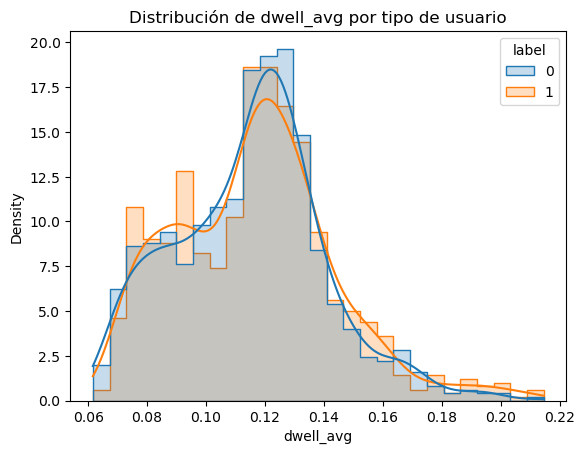

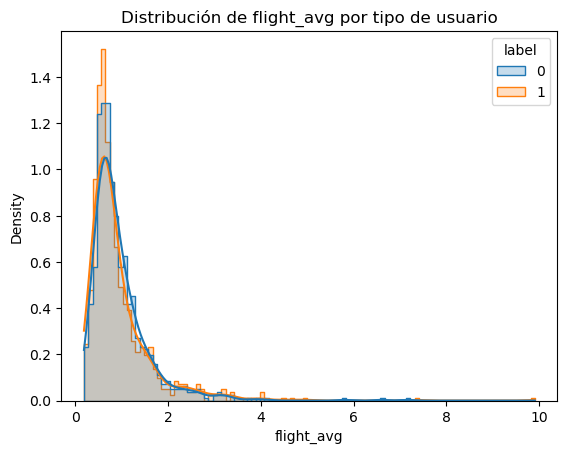

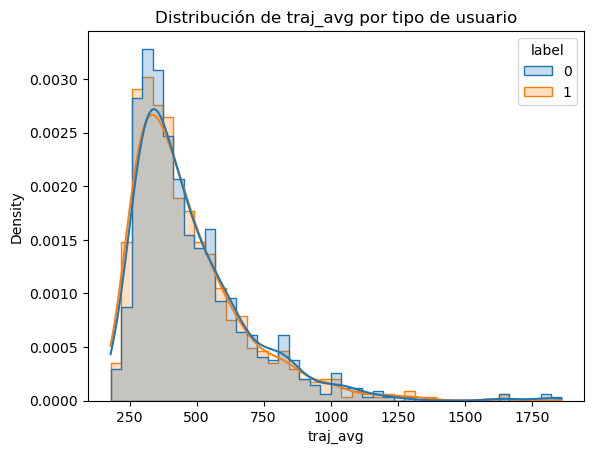

In [6]:
# Distribuciones separadas por clase
for col in ['dwell_avg', 'flight_avg', 'traj_avg']:
    plt.figure()
    sns.histplot(data=df, x=col, hue='label', kde=True, stat='density', element='step', common_norm=False)
    plt.title(f'Distribución de {col} por tipo de usuario')
    plt.show()

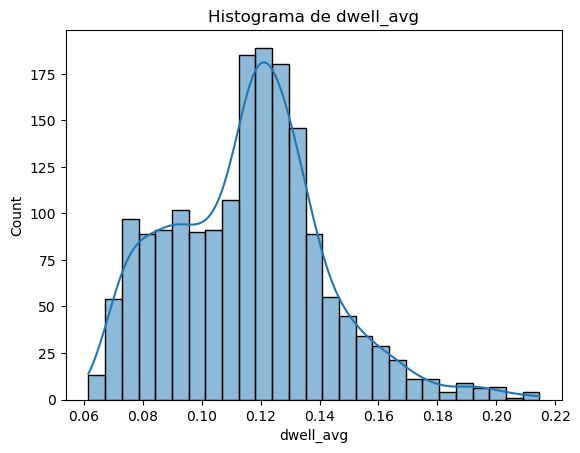

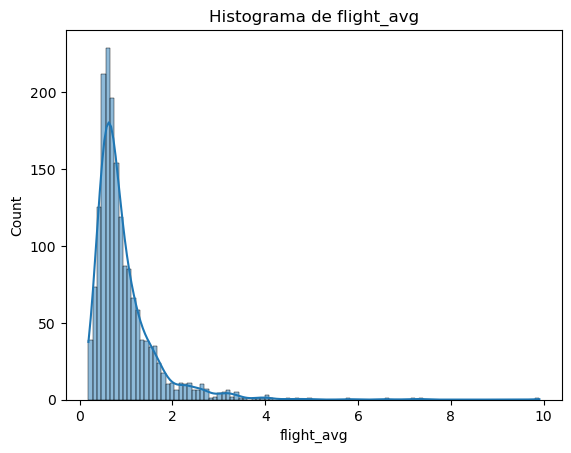

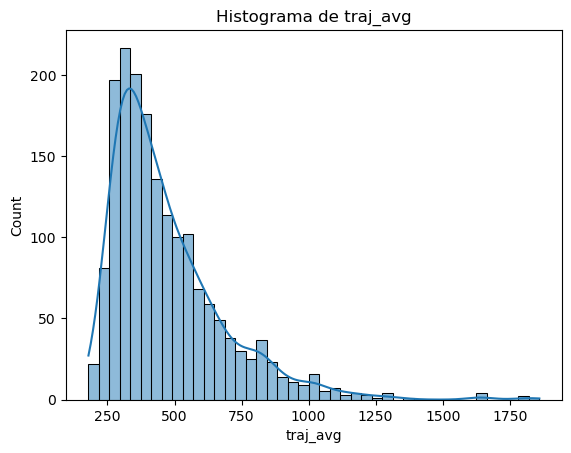

In [7]:
# Histogramas por variable
for col in ['dwell_avg', 'flight_avg', 'traj_avg']:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

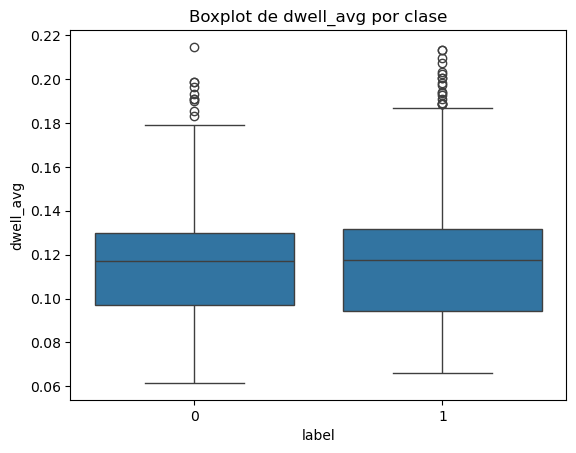

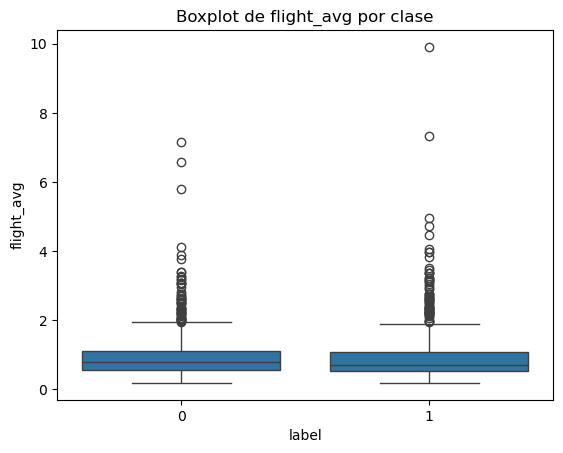

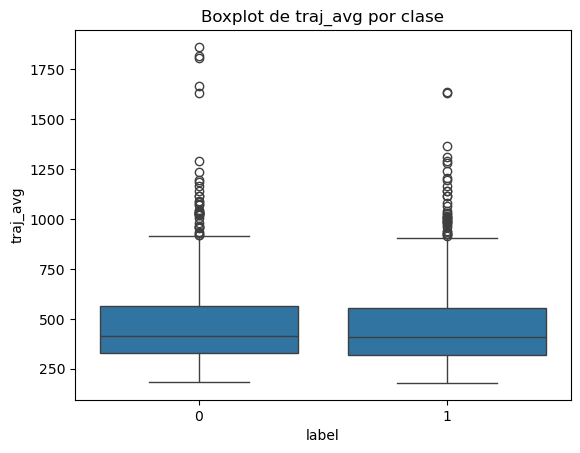

In [8]:
# Boxplots
for col in ['dwell_avg', 'flight_avg', 'traj_avg']:
    plt.figure()
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'Boxplot de {col} por clase')
    plt.show()

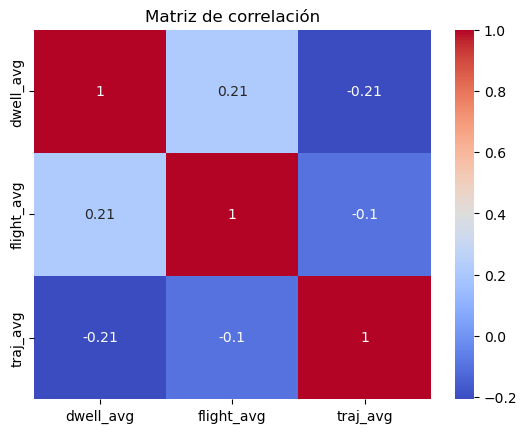

In [9]:
# Correlacion
corr = df[['dwell_avg', 'flight_avg', 'traj_avg']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [12]:
# test U de Mann-whiteney
for col in ['dwell_avg', 'flight_avg', 'traj_avg']:
    u_stat, p_val = mannwhitneyu(df[df['label']==0][col], df[df['label']==1][col])
    print(f"{col}: U={u_stat:.2f}, p={p_val:.4f}")
print("----------------------")
for var in ['dwell_avg', 'flight_avg', 'traj_avg']:
    group0 = df[df['label'] == 0][var]
    group1 = df[df['label'] == 1][var]
    
    stat, p = mannwhitneyu(group0, group1, alternative='two-sided')
    print(f"{var} → U-statistic = {stat:.2f}, p-value = {p:.5f}")

dwell_avg: U=379882.00, p=0.4924
flight_avg: U=414030.00, p=0.0118
traj_avg: U=398450.00, p=0.2913
----------------------
dwell_avg → U-statistic = 379882.00, p-value = 0.49245
flight_avg → U-statistic = 414030.00, p-value = 0.01184
traj_avg → U-statistic = 398450.00, p-value = 0.29130


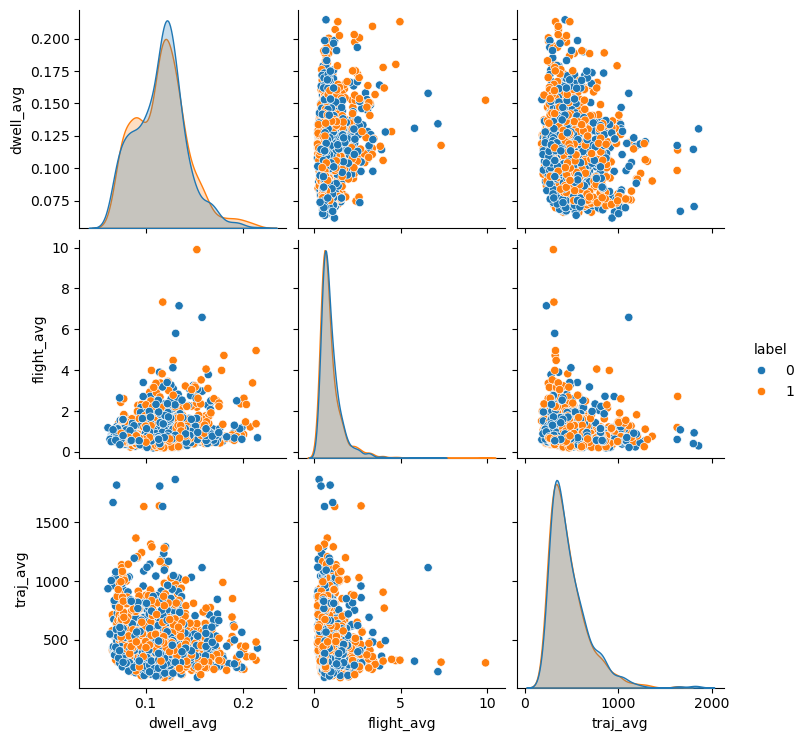

In [11]:
sns.pairplot(df, hue='label', vars=['dwell_avg', 'flight_avg', 'traj_avg'])
